<a href="https://colab.research.google.com/github/Devansh700/Week_2/blob/main/Copy_of_Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/the-wildfire-dataset


In [2]:
# Importing necessary librabries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers  import Conv2D , MaxPooling2D , Flatten , Dense , Dropout , Input

In [3]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
  tf.config.experimental.set_memory_growth(physical_devices[0 ], True)
  print('GPU is Available  !')
else :
  print('GPU is Unavilable !')

GPU is Unavilable !


In [4]:
train_dir = ' /kaggle/input/the-wildfire-datase/the_wildfire_dataset_2n_version (3 directories)/train'
val_dir = '/kaggle/input/the-wildfire-datase/the_wildfire_dataset_2n_version (3 directories)/val'
test_dir = '/kaggle/input/the-wildfire-datase/the_wildfire_dataset_2n_version (3 directories)/test'

In [5]:
import os

print(os.listdir(path))

dataset_dir = os.path.join(path, 'the_wildfire_dataset_2n_version')
print(os.listdir(dataset_dir))



train_dir = os.path.join(dataset_dir, 'train')
classes = os.listdir(train_dir)
print(f'Classes: {classes}')

# list all the classes
classes = os. listdir(train_dir)
num_classes = len(classes)
print(f'Number of classes : {num_classes }' )
print(f'Classes : {classes}')

['the_wildfire_dataset_2n_version']
['val', 'test', 'train']
Classes: ['nofire', 'fire']
Number of classes : 2
Classes : ['nofire', 'fire']


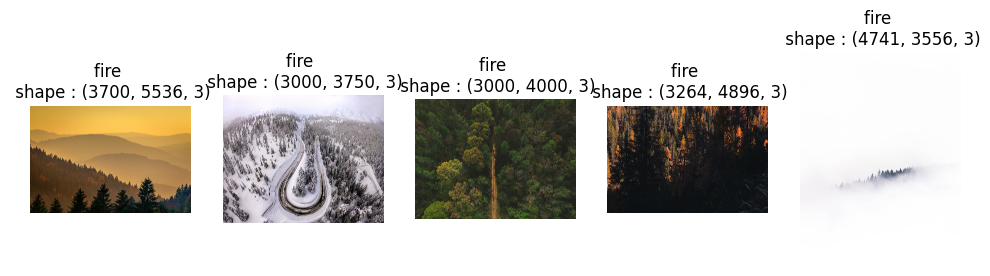

In [6]:
plt.figure(figsize=(12 , 10))
for i in range(5):
  class_path = os.path.join(train_dir , classes [0] )
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path , img_name)
  img = plt.imread(img_path)
  plt.subplot(1 , 5 , i+1)
  plt.imshow(img)
  plt.title(f'{classes[1]} \n shape : {img.shape}')
  plt.axis('off')
plt.show()

In [7]:
img_width , img_height = 150 , 150
batch_size = 32

train_datagen = ImageDataGenerator( rescale = 1./255)
val_datagen = ImageDataGenerator( rescale = 1./255)
test_datagen = ImageDataGenerator( rescale = 1./255)

train_generator = train_datagen.flow_from_directory( train_dir ,
                                                    target_size = (img_width , img_height) ,
                                                     batch_size = batch_size ,
                                                    class_mode = 'binary' ,
                                                     shuffle = True
                                                     )

val_generator = train_datagen.flow_from_directory( train_dir ,
                                                    target_size = (img_width , img_height) ,
                                                     batch_size = batch_size ,
                                                    class_mode = 'binary' ,
                                                     shuffle = True
                                                     )



test_generator = train_datagen.flow_from_directory( train_dir ,
                                                    target_size = (img_width , img_height) ,
                                                     batch_size = batch_size ,
                                                    class_mode = 'binary' ,
                                                     shuffle = True
                                                     )

Found 1887 images belonging to 2 classes.
Found 1887 images belonging to 2 classes.
Found 1887 images belonging to 2 classes.


In [8]:
class_mapping = train_generator.class_indices


class_names = list(class_mapping.keys())

print( "class names ", class_names)

class names  ['fire', 'nofire']


In [9]:
model = Sequential ( [
    Input(shape=(img_width , img_height , 3)),
    Conv2D(32 , (3 , 3) , activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64 , (3 , 3) , activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128 , (3 , 3) , activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(512 , activation='relu'),
    Dropout(0.5),
    Dense(1 , activation='sigmoid')
])

In [10]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)